## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint



In [2]:
#Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
#shape and type of x_train and y_train
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# Plot the first 25 images from the training set
def showimg():
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(x_train[i],cmap='binary')
        plt.title(y_train[i])
        plt.axis('off')
    plt.show()


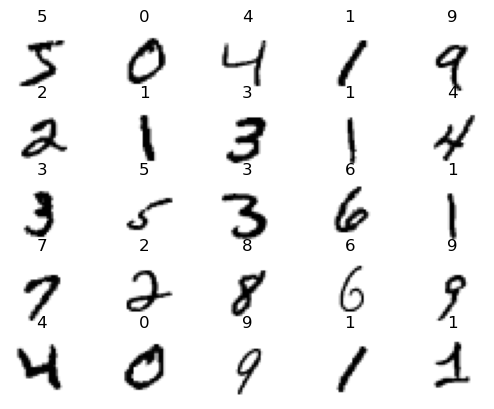

In [5]:
showimg()

In [6]:
#preprocess the images
#normalise and reshape
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

In [7]:
#convert classes to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
#Check shape of the training and testing sets
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [9]:
# Define the model architecture
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
#callbacks
es=EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)
mc=ModelCheckpoint('./final.h5',monitor='val_accuracy', verbose=1,save_best_only=True)
cb=[es,mc]

In [20]:
model.fit(x_train, y_train, validation_split=0.3, epochs=5)
model.save('final.h5')

Epoch 1/5
1313/1313 [==============================] - 34s 25ms/step - loss: 0.0272 - accuracy: 0.9915 - val_loss: 0.0427 - val_accuracy: 0.9881
Epoch 2/5
1313/1313 [==============================] - 45s 34ms/step - loss: 0.0241 - accuracy: 0.9916 - val_loss: 0.0409 - val_accuracy: 0.9883
Epoch 3/5
1313/1313 [==============================] - 36s 27ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.0472 - val_accuracy: 0.9873
Epoch 4/5
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0192 - accuracy: 0.9936 - val_loss: 0.0422 - val_accuracy: 0.9884
Epoch 5/5
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0407 - val_accuracy: 0.9891


In [21]:
# Train the model
history = model.fit(x_train, y_train, validation_split=0.3, epochs=5, callbacks=cb)

Epoch 1/5
1313/1313 [==============================] - ETA: 0s - loss: 0.0153 - accuracy: 0.9947
Epoch 1: val_accuracy improved from -inf to 0.98950, saving model to .\final.h5
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0153 - accuracy: 0.9947 - val_loss: 0.0418 - val_accuracy: 0.9895
Epoch 2/5
1310/1313 [============================>.] - ETA: 0s - loss: 0.0142 - accuracy: 0.9949
Epoch 2: val_accuracy improved from 0.98950 to 0.99028, saving model to .\final.h5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0141 - accuracy: 0.9950 - val_loss: 0.0404 - val_accuracy: 0.9903
Epoch 3/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.0139 - accuracy: 0.9952
Epoch 3: val_accuracy did not improve from 0.99028
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0139 - accuracy: 0.9952 - val_loss: 0.0433 - val_accuracy: 0.9892
Epoch 4/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.0133 - accuracy: 

In [22]:
save_model = keras.models.load_model('final.h5')

In [23]:
# Evaluate the model on the test set
test_loss, test_acc = save_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0324 - accuracy: 0.9910
Test accuracy: 0.9909999966621399


313/313 [==============================] - 1s 4ms/step


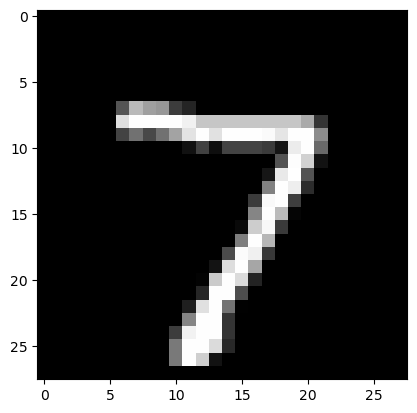

Predicted: 7
Actual: 7


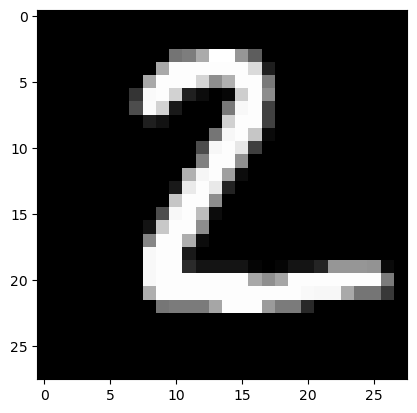

Predicted: 2
Actual: 2


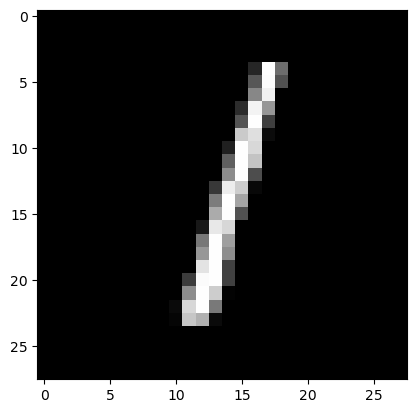

Predicted: 1
Actual: 1


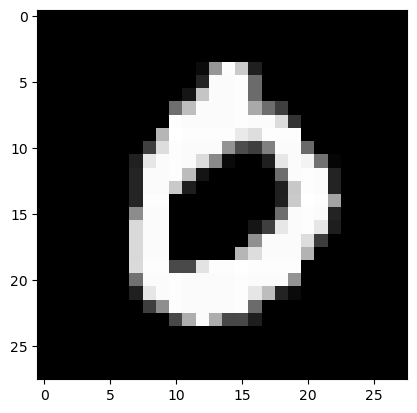

Predicted: 0
Actual: 0


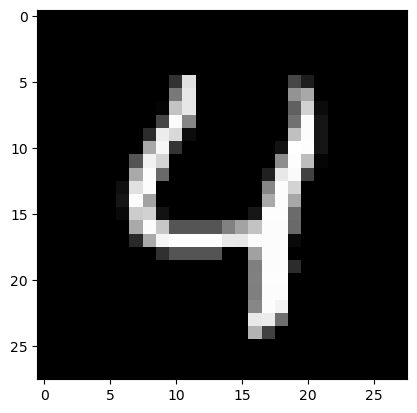

Predicted: 4
Actual: 4


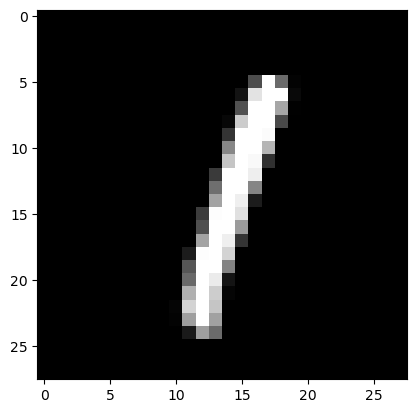

Predicted: 1
Actual: 1


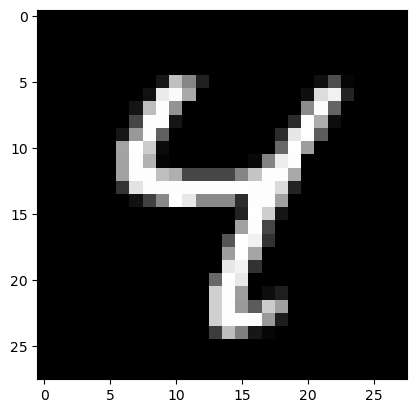

Predicted: 4
Actual: 4


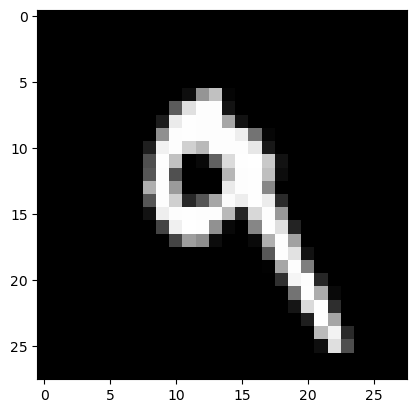

Predicted: 9
Actual: 9


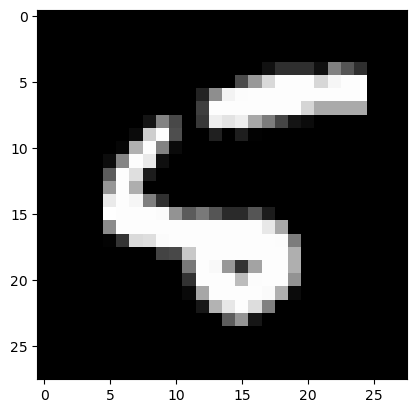

Predicted: 5
Actual: 5


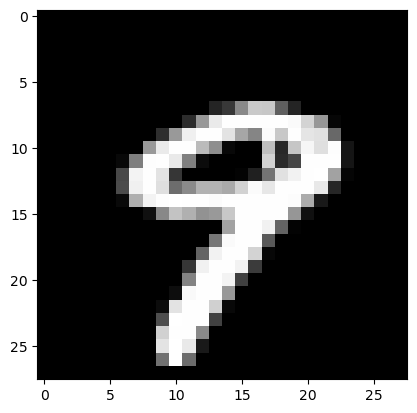

Predicted: 9
Actual: 9


In [24]:
#use trained model to predict on test data and show the image
predictions = save_model.predict(x_test)
for i in range(10):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.show()
    print(f'Predicted: {np.argmax(predictions[i])}')
    print(f'Actual: {np.argmax(y_test[i])}')
    